In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from keras.datasets import mnist

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('mnist.npz')

11493376/11490434 [==============================] - 66s 6us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

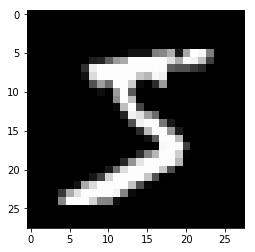

In [13]:
plt.imshow(X_train[0],cmap='gray')

In [14]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [15]:
X_train.shape

(60000, 784)

In [16]:
from keras.utils.np_utils import to_categorical

In [17]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [21]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
y_train_cat.shape

(60000, 10)

In [23]:
y_test_cat.shape

(10000, 10)

In [24]:
y_train[0]

5

In [25]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Fully connected Neural Network

In [27]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [28]:
K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 163us/step - loss: 0.3232 - accuracy: 0.9008 - val_loss: 0.1399 - val_accuracy: 0.9585
Epoch 2/10
42000/42000 [==============================] - 5s 126us/step - loss: 0.1111 - accuracy: 0.9668 - val_loss: 0.1537 - val_accuracy: 0.9541
Epoch 3/10
42000/42000 [==============================] - 5s 126us/step - loss: 0.0710 - accuracy: 0.9781 - val_loss: 0.1586 - val_accuracy: 0.9570
Epoch 4/10
42000/42000 [==============================] - 6s 131us/step - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.1148 - val_accuracy: 0.9714
Epoch 5/10
42000/42000 [==============================] - 5s 128us/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.1294 - val_accuracy: 0.9676
Epoch 6/10
42000/42000 [==============================] - 5s 128us/step - loss: 0.0288 - accuracy: 0.9917 - val_loss: 0.1196 - val_accuracy: 0.9739
Epoch 7/10
42000/42000 [==============================] - 6s 

Text(0.5, 0, 'Epochs')

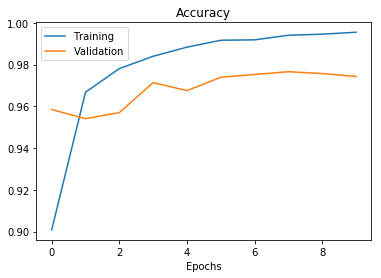

In [33]:
#h.history
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [32]:
h.history

{'val_loss': [0.13988284530242284,
  0.15369412420855627,
  0.15855982178780767,
  0.11481092893580595,
  0.12936217275758585,
  0.11959565679687592,
  0.11966878164600994,
  0.12657879421199322,
  0.13991560151971255,
  0.15018168229609727],
 'val_accuracy': [0.9585000276565552,
  0.9541110992431641,
  0.9570000171661377,
  0.9713888764381409,
  0.967555582523346,
  0.9739444255828857,
  0.9752777814865112,
  0.9766111373901367,
  0.9757221937179565,
  0.9743333458900452],
 'loss': [0.3232051598089082,
  0.11105570379325322,
  0.07104270648814383,
  0.0511204630505471,
  0.03647409792599224,
  0.028780585055816033,
  0.02596458277682818,
  0.01929598229303069,
  0.017562187530965147,
  0.01557130143833499],
 'accuracy': [0.9008095,
  0.9667857,
  0.97809523,
  0.984,
  0.98838097,
  0.99169046,
  0.99188095,
  0.9940714,
  0.9945952,
  0.9955238]}

Text(0.5, 0, 'Epochs')

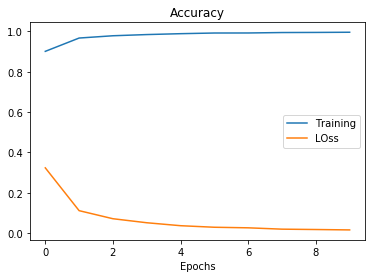

In [34]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['loss'])
plt.legend(['Training', 'LOss'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [47]:
y_pred=model.predict_classes(X_test)

In [48]:
y_pred.shape

(10000,)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [50]:
y_test.shape

(10000,)

In [51]:
cm=confusion_matrix(y_test,y_pred)

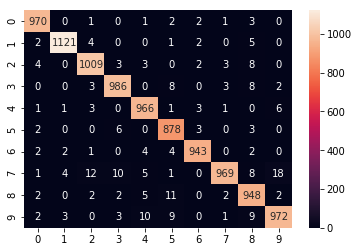

In [52]:
sns.heatmap(cm,annot=True,fmt='g')

In [53]:
accuracy_score(y_test,y_pred)

0.9762

In [54]:
result=pd.DataFrame({'Exp_result':y_test,'Pred_result':y_pred})

In [55]:
result

,Exp_result,Pred_result
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


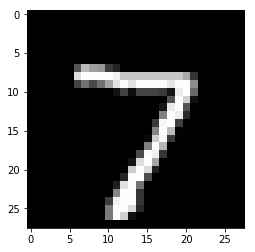

In [57]:
plt.imshow(X_test[0].reshape(28,28),cmap='gray')

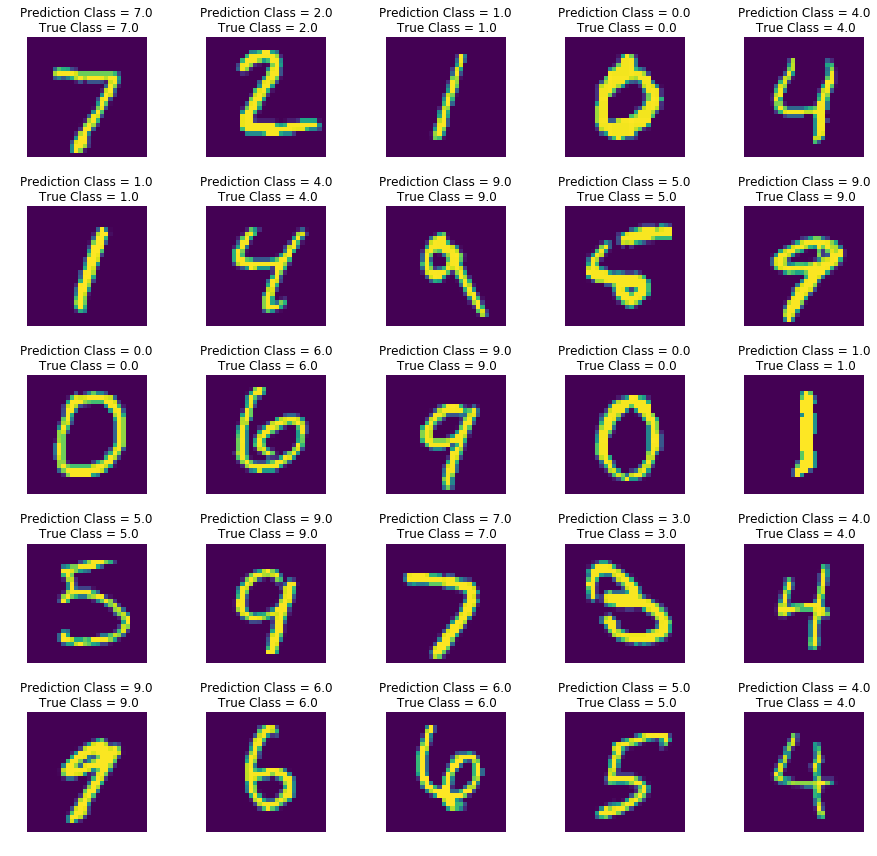

In [60]:
L=5
W=5

fig,axes=plt.subplots(L,W,figsize=(15,15))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [61]:
X_test.shape

(10000, 784)